Here we compare the 3 methods we considered: KNN with Cross Validation, Bayesiean KNN and Bayesian HMM

# Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns; sns.set()

from scipy.spatial import distance
#from fastdtw import fastdtw

#from sktime.utils.load_data import load_from_tsfile_to_dataframe

from sklearn.model_selection import GridSearchCV

In [2]:
#from sktime.classifiers.distance_based import KNeighborsTimeSeriesClassifier
#from Bayesian_knn.BayKNN import BayesianNeighborsTimeSeriesClassifier
from Bayesian_hmm import *

# ECG200

In [4]:
X_train, y_train = load_from_tsfile_to_dataframe('data/ECG200/ECG200_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe('data/ECG200/ECG200_TEST.ts')

In [3]:
data_train = pd.read_csv('data/ECG200/ECG200_TRAIN.txt', header=None)
data_test = pd.read_csv('data/ECG200/ECG200_TEST.txt', header=None)

In [4]:
X_train = {}
for i in range(len(data_train)):
    obs = [float(ele) for ele in data_train.loc[i][0].split(' ') if ele != '']
    if obs[0] in X_train:
        X_train[obs[0]].append(obs[1:])
    else:
        X_train[obs[0]] = [obs[1:]]
X_test = []
y_test = []
for i in range(len(data_test)):
    obs = [float(ele) for ele in data_test.loc[i][0].split(' ') if ele != '']
    X_test.append(obs[1:])
    y_test.append(obs[0])

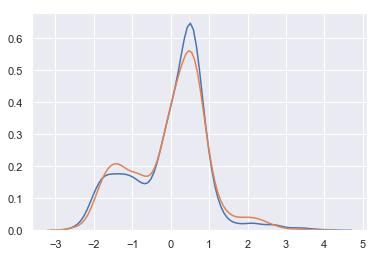

In [5]:
sns.distplot(np.concatenate(X_train[1]), hist=False)
sns.distplot(np.concatenate(X_train[-1]), hist=False)
plt.show()

### KNN

In [5]:
%%time
clf_knn = KNeighborsTimeSeriesClassifier()
parameters = {'n_neighbors':[2,3,4,5,10]}

knn_grid = GridSearchCV(clf_knn , parameters)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_['n_neighbors']

k_opt = knn_grid.best_params_['n_neighbors']

clf_knn = KNeighborsTimeSeriesClassifier(n_neighbors=k_opt, metric='dtw')
clf_knn.fit(X_train, y_train) 
accu_knn = clf_knn.score(X_test, y_test)
accu_knn

Wall time: 3.77 s


0.72

### Bayesian KNN

In [6]:
%%time
clf_bknn = BayesianNeighborsTimeSeriesClassifier(metric='dtw', p_gamma = 1/8, n_neighbors_bayes=77)
clf_bknn.fit(X_train, y_train)
accu_bknn = clf_bknn.score(X_test, y_test)
accu_bknn

Wall time: 2.91 s


0.84

### Bayesian HMM

In [17]:
%time models = build_hmm_models(X_train, 2, 2, bayesian_hmm, n_iter_gibbs=2000, max_obs=900)

Building 2  Bayesian HMM instances with 2 hidden states ...
------
Fitting Class -1.0 ...
Model fitted
------
Fitting Class 1.0 ...
Model fitted
Wall time: 5min 57s


In [20]:
preds = assign_classes(X_test, models)
accu_bhmm = np.sum(preds == np.array(y_test)) / len(preds)
accu_bhmm

0.35

# CricketX

In [7]:
X_train, y_train = load_from_tsfile_to_dataframe('data/CricketX/CricketX_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe('data/CricketX/CricketX_TEST.ts')

### KNN

In [8]:
%%time
clf_knn = KNeighborsTimeSeriesClassifier()
parameters = {'n_neighbors':[2,3,4,5,10]}

knn_grid = GridSearchCV(clf_knn , parameters)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_['n_neighbors']

k_opt = knn_grid.best_params_['n_neighbors']

clf_knn = KNeighborsTimeSeriesClassifier(n_neighbors=k_opt, metric='dtw')
clf_knn.fit(X_train, y_train) 
accu_knn = clf_knn.score(X_test, y_test)
accu_knn

Wall time: 15min 2s


0.7256410256410256

### Bayesian KNN

In [9]:
%%time
clf_bknn = BayesianNeighborsTimeSeriesClassifier(metric='dtw', p_gamma = 1/8, n_neighbors_bayes=77)
clf_bknn.fit(X_train, y_train)
accu_bknn = clf_bknn.score(X_test, y_test)
accu_bknn

Wall time: 6min 16s


0.735897435897436

# Adiac

In [25]:
X_train, y_train = load_from_tsfile_to_dataframe('data/Adiac/Adiac_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe('data/Adiac/Adiac_TEST.ts')

### KNN

In [26]:
%%time
clf_knn = KNeighborsTimeSeriesClassifier()
parameters = {'n_neighbors':[2,3,4,5,10]}

knn_grid = GridSearchCV(clf_knn , parameters)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_['n_neighbors']

k_opt = knn_grid.best_params_['n_neighbors']

clf_knn = KNeighborsTimeSeriesClassifier(n_neighbors=k_opt, metric='dtw')
clf_knn.fit(X_train, y_train) 
accu_knn = clf_knn.score(X_test, y_test)
accu_knn

Wall time: 1min 48s


0.5575447570332481

### Bayesian KNN

In [31]:
%%time
clf_bknn = BayesianNeighborsTimeSeriesClassifier(metric='dtw', p_gamma = 1/8)
clf_bknn.fit(X_train, y_train)
accu_bknn = clf_bknn.score(X_test, y_test)
accu_bknn

Wall time: 50.7 s


0.5549872122762148

# Epilepsy

In [68]:
X_train, y_train = load_from_tsfile_to_dataframe('data/Epilepsy/Epilepsy_TRAIN.ts')
X_test, y_test = load_from_tsfile_to_dataframe('data/Epilepsy/Epilepsy_TEST.ts')

X_train = X_train[['dim_0']]
X_test = X_test[['dim_0']]

### KNN

In [14]:
%%time
clf_knn = KNeighborsTimeSeriesClassifier()
parameters = {'n_neighbors':[2,3,4,5,10]}

knn_grid = GridSearchCV(clf_knn , parameters)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_['n_neighbors']

k_opt = knn_grid.best_params_['n_neighbors']

clf_knn = KNeighborsTimeSeriesClassifier(n_neighbors=k_opt, metric='dtw')
clf_knn.fit(X_train, y_train) 
accu_knn = clf_knn.score(X_test, y_test)
accu_knn

Wall time: 27 s


0.9565217391304348

### Bayesian KNN

In [15]:
%%time
clf_bknn = BayesianNeighborsTimeSeriesClassifier()
clf_bknn.fit(X_train, y_train)
accu_bknn = clf_bknn.score(X_test, y_test)
accu_bknn

Wall time: 13.2 s


0.9637681159420289

# Sim1

In [40]:
X_train = pd.read_csv('data/Simulated/Sim1_train.csv')
y_train = X_train['Class'].ravel()
X_train = X_train.drop(['Unnamed: 0', 'Class'], axis =1)
X_train = X_train.fillna(0)
X_train = pd.DataFrame([[X_train.iloc[i] ]for i in range(X_train.shape[0])])

In [41]:
X_test = pd.read_csv('data/Simulated/Sim1_test.csv')
y_test = X_test['Class'].ravel()
X_test = X_test.drop(['Unnamed: 0', 'Class'], axis =1)
X_test = X_test.fillna(0)
X_test = pd.DataFrame([[X_test.iloc[i] ]for i in range(X_test.shape[0])])

In [74]:
data_train = pd.read_csv('data/Simulated/Sim1_train.csv')
data_test = pd.read_csv('data/Simulated/Sim1_test.csv')

In [76]:
X_train_hmm = {}
for i in range(len(data_train)):
    obs = [ele for ele in data_train.loc[i][1:].values if ele == ele]
    if obs[0] in X_train_hmm:
        X_train_hmm[obs[0]].append(obs[2:])
    else:
        X_train_hmm[obs[0]] = [obs[2:]]
X_test_hmm = []
y_test_hmm = []
for i in range(len(data_test)):
    obs = [ele for ele in data_test.loc[i][1:].values if ele == ele]
    X_test_hmm.append(obs[2:])
    y_test_hmm.append(obs[0])

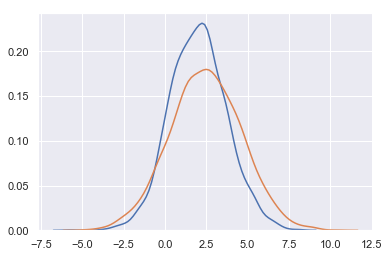

In [77]:
sns.distplot(np.concatenate(X_train_hmm[1]), hist=False)
sns.distplot(np.concatenate(X_train_hmm[2]), hist=False)

In [78]:
%time models = build_hmm_models(X_train_hmm, 2, 2, bayesian_hmm, n_iter_gibbs=2000, max_obs=900)

Building 2  Bayesian HMM instances with 2 hidden states ...
------
Fitting Class 2.0 ...
Model fitted
------
Fitting Class 1.0 ...
Model fitted
Wall time: 5min 40s


In [79]:
preds = assign_classes(X_test_hmm, models)
accu_bhmm = np.sum(preds == np.array(y_test_hmm)) / len(preds)
accu_bhmm

0.8837209302325582

### KNN

In [112]:
%%time
clf_knn = KNeighborsTimeSeriesClassifier()
parameters = {'n_neighbors':[2,3,4,5,10]}

knn_grid = GridSearchCV(clf_knn , parameters)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_['n_neighbors']

k_opt = knn_grid.best_params_['n_neighbors']

clf_knn = KNeighborsTimeSeriesClassifier(n_neighbors=k_opt, metric='dtw')
clf_knn.fit(X_train, y_train) 
accu_knn = clf_knn.score(X_test, y_test)
accu_knn

Wall time: 2.98 s


0.6744186046511628

### Bayesian KNN

In [114]:
%%time
clf_bknn = BayesianNeighborsTimeSeriesClassifier()
clf_bknn.fit(X_train, y_train)
accu_bknn = clf_bknn.score(X_test, y_test)
accu_bknn

Wall time: 772 ms


0.6511627906976745

# Sim2

In [19]:
X_train = pd.read_csv('data/Simulated/Sim2_train.csv')
y_train = X_train['Class'].ravel()
X_train = X_train.drop(['Unnamed: 0', 'Class'], axis =1)
X_train = X_train.fillna(0)
X_train = pd.DataFrame([[X_train.iloc[i] ]for i in range(X_train.shape[0])])

In [20]:
X_test = pd.read_csv('data/Simulated/Sim2_test.csv')
y_test = X_test['Class'].ravel()
X_test = X_test.drop(['Unnamed: 0', 'Class'], axis =1)
X_test = X_test.fillna(0)
X_test = pd.DataFrame([[X_test.iloc[i] ]for i in range(X_test.shape[0])])

In [81]:
data_train = pd.read_csv('data/Simulated/Sim2_train.csv')
data_test = pd.read_csv('data/Simulated/Sim2_test.csv')

In [82]:
X_train_hmm = {}
for i in range(len(data_train)):
    obs = [ele for ele in data_train.loc[i][1:].values if ele == ele]
    if obs[0] in X_train_hmm:
        X_train_hmm[obs[0]].append(obs[2:])
    else:
        X_train_hmm[obs[0]] = [obs[2:]]
X_test_hmm = []
y_test_hmm = []
for i in range(len(data_test)):
    obs = [ele for ele in data_test.loc[i][1:].values if ele == ele]
    X_test_hmm.append(obs[2:])
    y_test_hmm.append(obs[0])

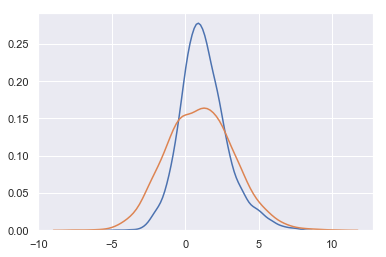

In [83]:
sns.distplot(np.concatenate(X_train_hmm[1]), hist=False)
sns.distplot(np.concatenate(X_train_hmm[2]), hist=False)

In [85]:
%time models = build_hmm_models(X_train_hmm, 2, 3, bayesian_hmm, n_iter_gibbs=2000, max_obs=900)

Building 2  Bayesian HMM instances with 3 hidden states ...
------
Fitting Class 3.0 ...
Model fitted
------
Fitting Class 2.0 ...
Model fitted
------
Fitting Class 1.0 ...
Model fitted
Wall time: 10min 8s


In [86]:
preds = assign_classes(X_test_hmm, models)
accu_bhmm = np.sum(preds == np.array(y_test_hmm)) / len(preds)
accu_bhmm

0.39655172413793105

### KNN

In [21]:
%%time
clf_knn = KNeighborsTimeSeriesClassifier()
parameters = {'n_neighbors':[2,3,4,5,10]}

knn_grid = GridSearchCV(clf_knn , parameters)
knn_grid.fit(X_train, y_train)
knn_grid.best_params_['n_neighbors']

k_opt = knn_grid.best_params_['n_neighbors']

clf_knn = KNeighborsTimeSeriesClassifier(n_neighbors=k_opt, metric='dtw')
clf_knn.fit(X_train, y_train) 
accu_knn = clf_knn.score(X_test, y_test)
accu_knn

Wall time: 5.06 s


0.5862068965517241

### Bayesian KNN

In [22]:
%%time
clf_bknn = BayesianNeighborsTimeSeriesClassifier()
clf_bknn.fit(X_train, y_train)
accu_bknn = clf_bknn.score(X_test, y_test)
accu_bknn

Wall time: 2.52 s


0.5517241379310345